# Part 1

In [1]:
#importing necessary libraries
from itertools import product
from math import sqrt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.integrate import odeint


### Importing Data, EDA and Data Manipulation

In [2]:
##Data is imported as dataframe
states = pd.read_csv("us-states.csv")


In [3]:
##Filtering out texas
texas_index = states["state"] == 'Texas'
texas = states[texas_index]


Text(0, 0.5, 'Case Count')

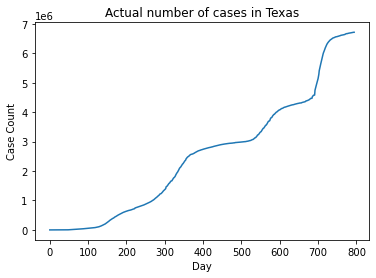

In [4]:
##Trend of cummulative cases
t = np.linspace(0, 794, 794)
plt.plot(t, texas["cases"])
plt.title("Actual number of cases in Texas")
plt.xlabel("Day")
plt.ylabel("Case Count")

In [5]:
#time period = days
t = np.linspace(0, 794, 794)

#I[t] is the number of cases per day/true outcome
I =  []
for count in texas["cases"]:
    I.append(count)
    
#N: total population - taken from https://www.census.gov/quickfacts/TX
N = 29527941

<ipython-input-6-5129ae08d6ec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas["infected"] = texas["cases"] - x


Text(0, 0.5, 'Fraction of Population')

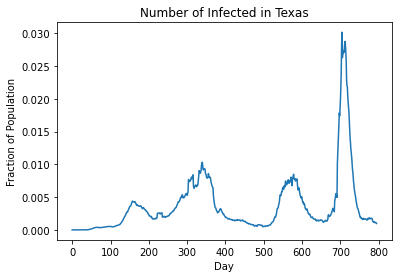

In [6]:
## Trend to see how I is changing to calibrate the values of 
x = list(texas["cases"])
for i in range(0,13):
    x.insert(0,0)
x = x[:-13]
texas["infected"] = texas["cases"] - x
plt.plot(t, texas["infected"]/N)
plt.title("Number of Infected in Texas")
plt.xlabel("Day")
plt.ylabel("Fraction of Population")

In [7]:
#parts of code taken from SIR.Extensions.ipynb from Canvas

#number of infected people and recovered people initially
#using same values as code. Assuming not very many people were infected in Texas, since outbreak started in Washington state
I0 = 1

#formula for estimating R0 taken from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7751056/
        #  R0 = I[t] * SI / t , were SI is the time between the first and second COVID case
        #second covid case data from 
R0 = 0

#number  of people who are initially susceptible
S0 = N - I0 - R0 

# Initial vector
y0 = S0, I0, R0

# average recovery time is 2 weeks 
gamma = 1/14

### SIR Model

In [8]:
#code taken from SIR.Extensions.ipynb from Canvas
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [9]:
#code below taken from SIR.Extensions.ipynb from Canvas
#x0 = major outbreak occurs (state of emergency) = March 12

#data looked at: https://www.worldometers.info/coronavirus/usa/texas/
e = [0,150,200,250,340,370,400,500,557,580,610,640,660,700,708]
R0 = [2.99,1,0.59,1.5,1.0,0.3,.88,1.9,1.22,1,.5,1.04,1.04,3.8,.7,0.4]
x0 = [100,200,210,300,580,700,700,705,705,705,705,705,705,705,705]

k=.01
def dyn_R_0(time):
    z = 0
    for i in range(len(e)):
        if time > e[i]:
            R_start = R0[i]
            R_end =  R0[i+1]
            x = x0[i]
            z = logistic_R_0(time, R_start, R_end, x)
    return z

def logistic_R_0(time, R_start, R_end, x0):
    return (R_start-R_end) / (1 + np.exp(-k*(-time+x0))) + R_end

def logistic_beta(time):
    R0_list.append((time,dyn_R_0(time)))
    return dyn_R_0(time) * gamma

In [10]:
def root_mean_square_error(x,y):
    total = 0
    N = len(x)
    for i in range(len(x)):
        dif = x[i] - y[i]
        total = total + (dif**2)
    return sqrt(total/N)
     

In [11]:
def mean_absolute_error(x,y):
    total = 0
    N = len(x)
    for i in range(len(x)):
        dif = x[i] - y[i]
        total = total + abs(dif)
    return total/N

In [12]:
#code taken from SIR.Extensions.ipynb from Canvas
R0_list = []
ret = odeint(deriv_dynamic, y0, t,args=(N, logistic_beta, gamma))
S, I, R = ret.T


### Results from the SIR model and Errors

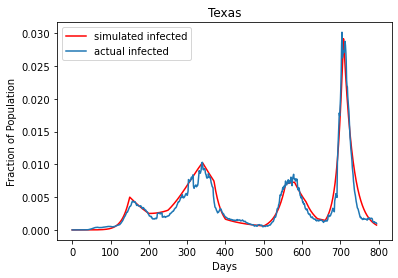

In [13]:
plt.figure(facecolor = 'w')
plt.plot(t, I/N, 'r', label = "simulated infected")
plt.plot(t, texas["infected"]/N, label = "actual infected")

plt.xlabel("Days")
plt.ylabel("Fraction of Population")
plt.title("Texas")
plt.legend()


### root mean square error

In [14]:
actual_I = list(texas["infected"])
simulated_I = I 
print("The root mean square error is:", round(root_mean_square_error(actual_I, simulated_I),1))
print("The mean absolute error is:", round(mean_absolute_error(actual_I, simulated_I)),2)

The root mean square error is: 31691.9
The mean absolute error is: 20166 2


# Part 2

## Plotting changes in R0

In [15]:
#cite: data from https://www.healthdata.org/covid/data-downloads

##Loading 2 years of data as a dataframe
df2020=pd.read_csv('data_download_file_reference_2020.csv')
df2021=pd.read_csv('data_download_file_reference_2021.csv')
df2022=pd.read_csv('data_download_file_reference_2022.csv')

In [16]:
##Creating a master dataframe containing all 3 years of data
df20_21=df2020.append(df2021)
df_covid=df20_21.append(df2022)

In [17]:
##Retriving the columns required.
df_covid=df_covid.loc[:,['date','location_name','daily_deaths','cumulative_deaths', 'daily_cases','daily_deaths',
               'cumulative_cases', 'cumulative_hospitalizations','population','mobility_mean', 
               'testing_mean','pneumonia_mean','mask_use_mean','cumulative_all_vaccinated', 'cumulative_all_fully_vaccinated',
       'cumulative_all_effectively_vaccinated']]

In [18]:
##Retriving values for Texas 
df_covid_texas=df_covid[df_covid['location_name'] == 'Texas']
df_covid_texas.reset_index(inplace=True,drop=True)

In [19]:
##Using the values of our R0 from SIR model we are calculating our dynamic R0 for all t
t_new = np.linspace(0, len(df_covid_texas)-1, len(df_covid_texas))
e = [0,150,200,250,340,370,400,500,557,580,610,640,660,700,708]
R0 = [2.99,1,0.59,1.5,1.0,0.3,.88,1.9,1.22,1,.5,1.04,1.04,3.8,.7,0.4]
x0 = [100,200,210,300,580,700,700,705,705,705,705,705,705,705,705]

k=.01
r_0_finals=[]
for i in t_new:
    r_0_finals.append(dyn_R_0(i))

Text(0.5, 1.0, 'Mask vs Reproduction Number-Texas')

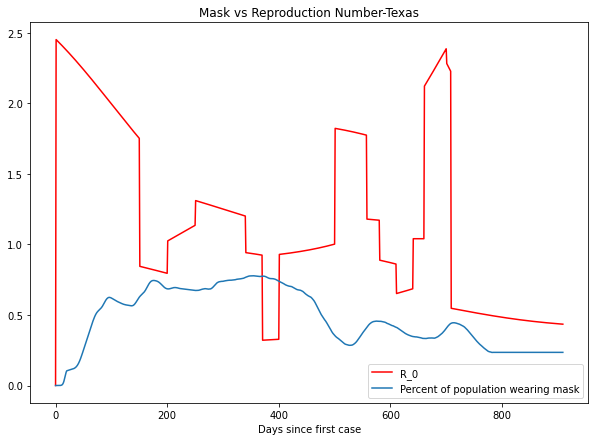

In [20]:
## Comparing masking with R0
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_finals,label='R_0',color='r')
plt.plot(t_new,df_covid_texas['mask_use_mean'],label='Percent of population wearing mask')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Mask vs Reproduction Number-Texas")

Text(0.5, 1.0, 'Mask vs Infection')

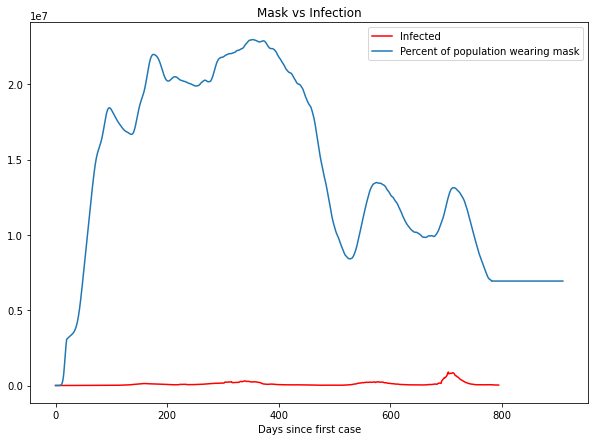

In [21]:
## Comparing masking with Infected
plt.figure(figsize=(10, 7))
plt.plot(t,texas['infected'],label='Infected',color='r')
plt.plot(t_new,df_covid_texas['mask_use_mean']*N,label='Percent of population wearing mask')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Mask vs Infection")

Text(0.5, 1.0, 'Vaccination vs Reproduction Number Texas')

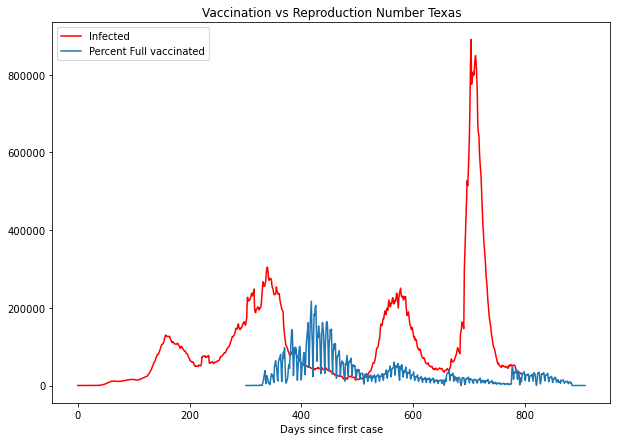

In [22]:
##Calculating daily vaccination and its trend with infected
new_vacc=[]
for i in range(1,len(df_covid_texas['cumulative_all_fully_vaccinated'])):
    new_vacc.append(df_covid_texas['cumulative_all_fully_vaccinated'][i]-df_covid_texas['cumulative_all_fully_vaccinated'][i-1])
plt.figure(figsize=(10, 7))
t_new1 = np.linspace(0, len(new_vacc)-1, len(new_vacc))
plt.plot(t,texas['infected'],label='Infected',color='r')
plt.plot(t_new1,np.array(new_vacc),label='Percent Full vaccinated')
plt.legend()

plt.xlabel("Days since first case")
plt.title("Vaccination vs Reproduction Number Texas")

Text(0.5, 1.0, 'Testing Texas')

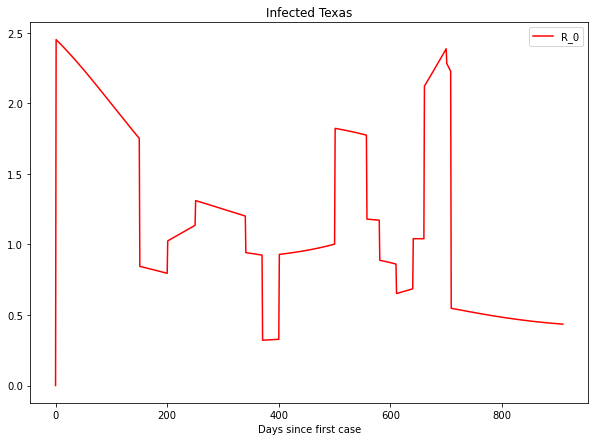

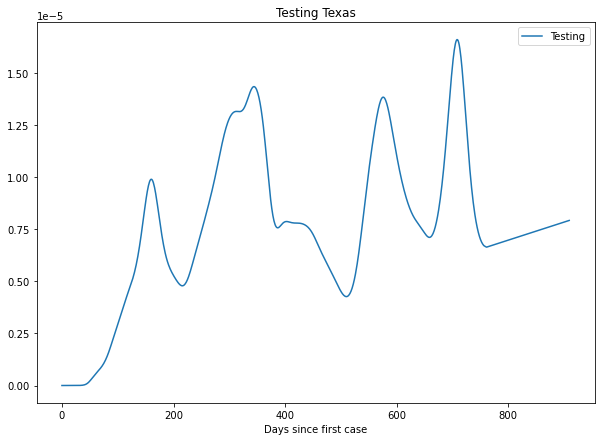

In [23]:
##Comparing R0 and testing
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_finals,label='R_0',color='r')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Infected Texas")
plt.figure(figsize=(10, 7))
plt.plot(t_new,df_covid_texas['testing_mean']/df_covid_texas['population'],label='Testing')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Testing Texas")

Text(0.5, 1.0, 'Vaccination vs Cummulative cases')

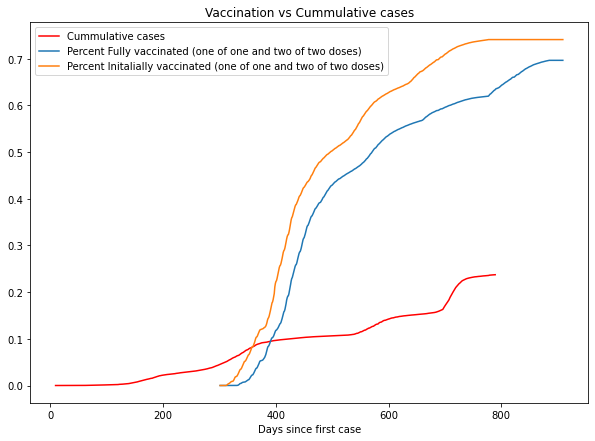

In [24]:
##Cummulative Vaccination with infection
plt.figure(figsize=(10, 7))
plt.plot(t_new,df_covid_texas['cumulative_cases']/df_covid_texas['population'],label='Cummulative cases',color='r')
plt.plot(t_new,df_covid_texas['cumulative_all_fully_vaccinated']/df_covid_texas['population'],label='Percent Fully vaccinated (one of one and two of two doses)')
plt.plot(t_new,df_covid_texas['cumulative_all_vaccinated']/df_covid_texas['population'],label='Percent Initalially vaccinated (one of one and two of two doses)')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Vaccination vs Cummulative cases")

Text(0.5, 1.0, '%Change in Mobility  vs Reproduction Number-Texas')

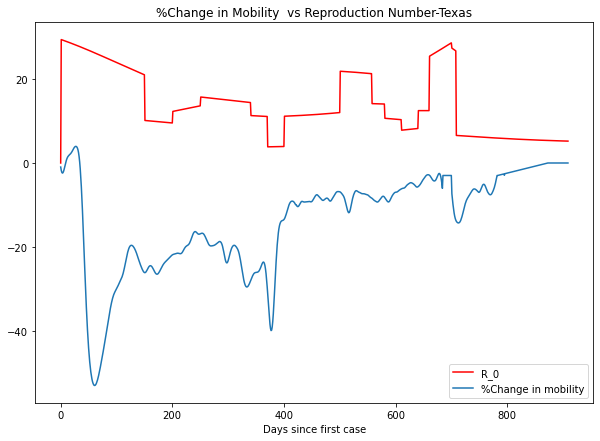

In [25]:
##Comparing mobility with R0
plt.figure(figsize=(10, 7))
r_0_scale=[12 * r for r in r_0_finals]
plt.plot(t_new,r_0_scale,label='R_0',color='r')
plt.plot(t_new,df_covid_texas['mobility_mean'],label='%Change in mobility')
plt.legend()
plt.xlabel("Days since first case")
plt.title("%Change in Mobility  vs Reproduction Number-Texas")